In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
data = np.loadtxt('../dataset/pima-indians-diabetes.csv', delimiter=',')

In [4]:
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness",  
                 "insulin", "BMI", "pedigree", "age", "class"])

In [5]:
df.iloc[:,:-1]

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
0           6     148        72         35        0  33.6     0.627   50
1           1      85        66         29        0  26.6     0.351   31
2           8     183        64          0        0  23.3     0.672   32
3           1      89        66         23       94  28.1     0.167   21
4           0     137        40         35      168  43.1     2.288   33
..        ...     ...       ...        ...      ...   ...       ...  ...
763        10     101        76         48      180  32.9     0.171   63
764         2     122        70         27        0  36.8     0.340   27
765         5     121        72         23      112  26.2     0.245   30
766         1     126        60          0        0  30.1     0.349   47
767         1      93        70         31        0  30.4     0.315   23

[768 rows x 8 columns]

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
df.describe()

pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [8]:
# 임신 횟수와 당뇨병 발병 확률
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000

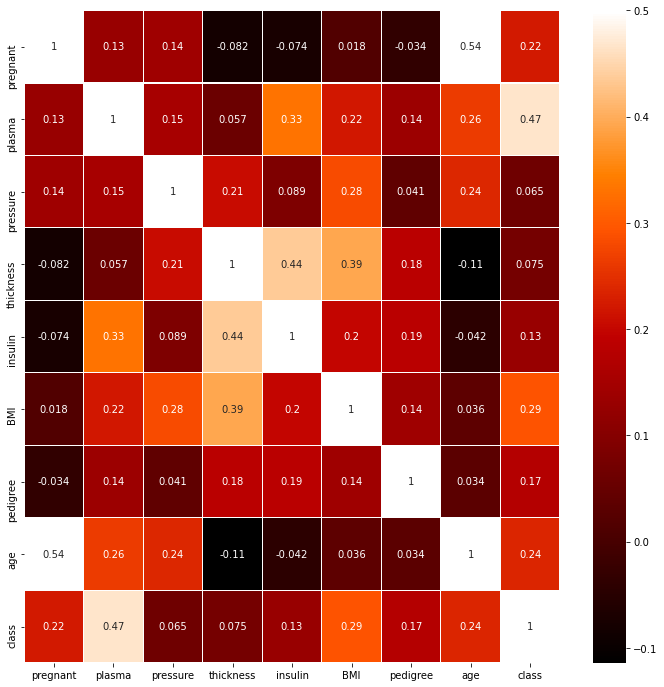

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), lw = 0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

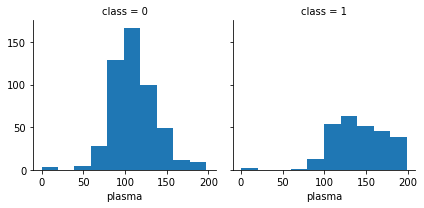

In [10]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], stratify = df.iloc[:,-1], test_size=0.2, random_state=2020)

In [12]:
model = Sequential([
    Dense(300, input_shape=(8, ), activation='elu', kernel_initializer='he_normal'),
    Dense(250, activation='elu', kernel_initializer='he_normal'),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dense(50, activation='elu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split= 0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/100
491/491 [==============================] - 1s 2ms/sample - loss: 14.9265 - accuracy: 0.5560 - val_loss: 16.1269 - val_accuracy: 0.2927
Epoch 2/100
491/491 [==============================] - 0s 240us/sample - loss: 5.6129 - accuracy: 0.5825 - val_loss: 5.2775 - val_accuracy: 0.3659
Epoch 3/100
491/491 [==============================] - 0s 204us/sample - loss: 3.2459 - accuracy: 0.5764 - val_loss: 1.5640 - val_accuracy: 0.7317
Epoch 4/100
491/491 [==============================] - 0s 208us/sample - loss: 1.7888 - accuracy: 0.6762 - val_loss: 4.1505 - val_accuracy: 0.7154

In [15]:
model.evaluate(x_test, y_test, verbose=2)[1]

154/154 - 0s - loss: 0.5900 - accuracy: 0.7403


0.74025977

In [12]:
model = Sequential([
    Dense(300, input_shape=(8, ), activation='relu'),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
cb = ModelCheckpoint('../model/best_model.hdf5', save_best_only=True)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split= 0.2, callbacks=[cb])

Train on 491 samples, validate on 123 samples
Epoch 1/100
491/491 [==============================] - 1s 1ms/sample - loss: 0.9950 - accuracy: 0.5764 - val_loss: 0.6560 - val_accuracy: 0.7073
Epoch 2/100
491/491 [==============================] - 0s 248us/sample - loss: 0.8201 - accuracy: 0.6334 - val_loss: 0.6383 - val_accuracy: 0.6992
Epoch 3/100
491/491 [==============================] - 0s 255us/sample - loss: 0.6881 - accuracy: 0.6008 - val_loss: 0.5925 - val_accuracy: 0.7236
Epoch 4/100
491/491 [==============================] - 0s 187us/sample - loss: 0.6515 - accuracy: 0.6619 - val_loss: 0.6257 - val_accuracy: 0.6667

In [16]:
del model

In [17]:
model = load_model('../model/best_model.hdf5')

In [18]:
model.evaluate(x_test, y_test, verbose=2)[1]

154/154 - 0s - loss: 0.5000 - accuracy: 0.7403


0.74025977

In [19]:
x_test.tail()

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
44          7     159        64          0        0  27.4     0.294   40
585         1      93        56         11        0  22.5     0.417   22
480         3     158        70         30      328  35.5     0.344   35
252         2      90        80         14       55  24.4     0.249   24
31          3     158        76         36      245  31.6     0.851   28

In [20]:
y_test.tail()

44     0
585    0
480    1
252    0
31     1
Name: class, dtype: int64

In [21]:
xtest =np.array([3, 158, 76, 36, 245, 31.6, 0.851, 28]).reshape(1, 8)
model.predict_classes(xtest)[0][0]

1